In [1]:
#We load the DataFrame.
from sodapy import Socrata
import pandas as pd


client = Socrata("analisi.transparenciacatalunya.cat", None)

result = client.get("q2sg-894k", limit=150000)

data = pd.DataFrame.from_records(result)

In [2]:
#We can choose from the following list:
print(*data.columns, sep='\n')

data
any
duradasegons
diasetmana
mes
hora
llengua
comarca
ambitterritorial
provincia
provinciaagrupada
sexe
edat
estatcivil
personaquetruca
situaciofamiliar
situaciofillsfilles
nombrefillsfilles
pateixenmaltractament
nacionalitatagrupada
formacio
situaciolaboral
detallsituaciolaboral
uspreviservei
motiutrucada
ambitviolenciamasclista
v_fisica
v_psicologica
v_sexual
v_economica
conviuagressor
relacioagressor
tempsderelacio
nacionalitatagressor
derivacio
reclamacionsqueixes
connexi_
detallfamiliarpersonaquetruca
tipusassessorament
xarxa
situaciolegal
tempsresidencia
derivacio_a
xarxa_a
detallambit
derivacio_b
xarxa_b
derivacio_c
xarxa_c
emergencia
detallprofessional
relacioagressorambitlaboral
traduccio
idiomatraduccio
situaciofillsfilles_a
nombrefillsfilles_a


Text(0.5, 1.0, '$0.003\\%$ of the calls')

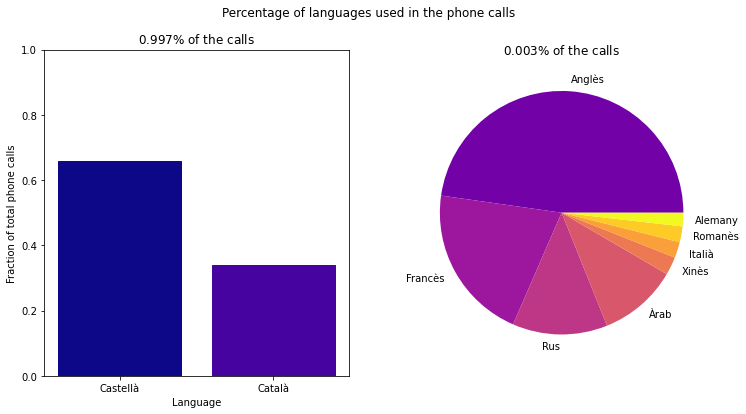

In [22]:
#Simple example.
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


cmap = cm.get_cmap('plasma')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

language = data['llengua'].value_counts()
values = language.values / language.values.sum()
labels = language.index

n = len(values)
colors = [cmap(int(256*i/(n-1))) for i in range(n)]

fig.suptitle('Percentage of languages used in the phone calls')

#Bar plot.
bars = axs[0].bar(labels[:2], values[:2])
bars[0].set_color(colors[0])
bars[1].set_color(colors[1])

axs[0].set_title(f'${sum(values[:2]):.3f}\%$ of the calls')
axs[0].set_xlabel('Language')
axs[0].set_ylabel('Fraction of total phone calls')
axs[0].set_ylim(0, 1)

#Pie plot.
_ = axs[1].pie(x=values[2:],
               labels=labels[2:],
               colors=colors[2:],
               normalize=True)

axs[1].set_title(f'${sum(values[2:]):.3f}\%$ of the calls')